In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl
import re

In [32]:
df=pd.read_csv("DF_LIMPIO(No outliers_Blu_pajarito20).csv")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31401 entries, 0 to 31400
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   31401 non-null  int64  
 1   host_acceptance_rate         26756 non-null  object 
 2   host_identity_verified       31398 non-null  object 
 3   property_type                31401 non-null  object 
 4   host_response_time           23076 non-null  object 
 5   number_of_reviews            31401 non-null  int64  
 6   review_scores_cleanliness    31401 non-null  float64
 7   availability_365             31401 non-null  int64  
 8   review_scores_location       31401 non-null  float64
 9   review_scores_value          31401 non-null  float64
 10  bathrooms_text               31401 non-null  float64
 11  price                        31401 non-null  float64
 12  neighbourhood_cleansed       31401 non-null  object 
 13  room_type       

In [34]:
print(df.isnull().sum())

Unnamed: 0                        0
host_acceptance_rate           4645
host_identity_verified            3
property_type                     0
host_response_time             8325
number_of_reviews                 0
review_scores_cleanliness         0
availability_365                  0
review_scores_location            0
review_scores_value               0
bathrooms_text                    0
price                             0
neighbourhood_cleansed            0
room_type                         0
accommodates                      0
beds                            195
minimum_nights                    0
maximum_nights                    0
has_availability                  0
review_scores_checkin             0
review_scores_communication       0
dtype: int64


In [35]:
df["host_acceptance_rate"].fillna("0%",inplace = True)
print(df.isnull().sum())

Unnamed: 0                        0
host_acceptance_rate              0
host_identity_verified            3
property_type                     0
host_response_time             8325
number_of_reviews                 0
review_scores_cleanliness         0
availability_365                  0
review_scores_location            0
review_scores_value               0
bathrooms_text                    0
price                             0
neighbourhood_cleansed            0
room_type                         0
accommodates                      0
beds                            195
minimum_nights                    0
maximum_nights                    0
has_availability                  0
review_scores_checkin             0
review_scores_communication       0
dtype: int64


In [36]:
df["host_identity_verified"].fillna(True,inplace = True)
print(df.isnull().sum())

Unnamed: 0                        0
host_acceptance_rate              0
host_identity_verified            0
property_type                     0
host_response_time             8325
number_of_reviews                 0
review_scores_cleanliness         0
availability_365                  0
review_scores_location            0
review_scores_value               0
bathrooms_text                    0
price                             0
neighbourhood_cleansed            0
room_type                         0
accommodates                      0
beds                            195
minimum_nights                    0
maximum_nights                    0
has_availability                  0
review_scores_checkin             0
review_scores_communication       0
dtype: int64


In [37]:
df["host_response_time"].fillna("No information",inplace = True)
print(df.isnull().sum())

Unnamed: 0                       0
host_acceptance_rate             0
host_identity_verified           0
property_type                    0
host_response_time               0
number_of_reviews                0
review_scores_cleanliness        0
availability_365                 0
review_scores_location           0
review_scores_value              0
bathrooms_text                   0
price                            0
neighbourhood_cleansed           0
room_type                        0
accommodates                     0
beds                           195
minimum_nights                   0
maximum_nights                   0
has_availability                 0
review_scores_checkin            0
review_scores_communication      0
dtype: int64


In [38]:
df["beds"]=df["beds"].fillna(round(df["beds"].mean(),0))

## Outliers

In [39]:
df_sel=df[["number_of_reviews","review_scores_cleanliness","availability_365","review_scores_location","review_scores_value","bathrooms_text","price","beds","review_scores_communication","review_scores_checkin","minimum_nights","maximum_nights","accommodates"]]

In [40]:
df_conc=df.drop(columns=["number_of_reviews","review_scores_cleanliness","availability_365","review_scores_location","review_scores_value","bathrooms_text","price","beds","review_scores_communication","review_scores_checkin","minimum_nights","maximum_nights","accommodates"])

<Axes: >

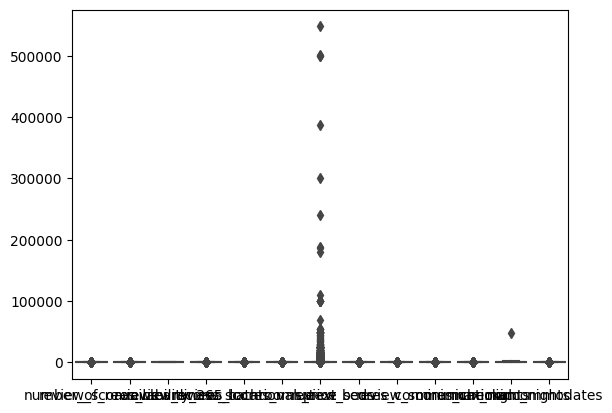

In [41]:
sns.boxplot(data=df_sel)

In [42]:
y = df_sel
percentile25 = y.quantile(0.25)
percentile75 = y.quantile(0.75)
iqr = percentile75 - percentile25
lower_bound = percentile25 - (1.5 * iqr)
upper_bound = percentile75 + (1.5 * iqr)
cleaned_data = df_sel[(df_sel >= lower_bound) & (df_sel <= upper_bound)]

print(cleaned_data)

       number_of_reviews  review_scores_cleanliness  availability_365  \
0                    0.0                       4.73                 0   
1                    1.0                        NaN                 0   
2                    1.0                       4.73               362   
3                    3.0                        NaN                 0   
4                    0.0                       4.73                 0   
...                  ...                        ...               ...   
31396                1.0                        NaN               360   
31397                0.0                       4.73               160   
31398               16.0                       4.63                79   
31399                0.0                       4.73                89   
31400                0.0                       4.73                86   

       review_scores_location  review_scores_value  bathrooms_text  price  \
0                        4.86                 

<Axes: >

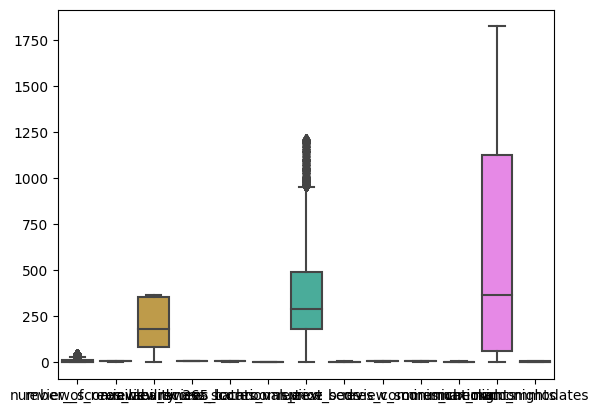

In [43]:
sns.boxplot(data=cleaned_data)

In [44]:
print(cleaned_data.isnull().sum())

number_of_reviews              3805
review_scores_cleanliness      2385
availability_365                  0
review_scores_location         2470
review_scores_value            2950
bathrooms_text                 1058
price                          3092
beds                            953
review_scores_communication    2950
review_scores_checkin          2950
minimum_nights                 2741
maximum_nights                    1
accommodates                   1157
dtype: int64


In [45]:
x=round(cleaned_data["number_of_reviews"].mean(),1)
print(x)
cleaned_data["number_of_reviews"].fillna(x,inplace = True)

7.6


In [46]:
x=round(cleaned_data["review_scores_cleanliness"].mean(),1)
print(x)
cleaned_data["review_scores_cleanliness"].fillna(x,inplace = True)

4.8


In [47]:
x=round(cleaned_data["availability_365"].mean(),1)
print(x)
cleaned_data["availability_365"].fillna(x,inplace = True)

199.7


In [49]:
x=round(cleaned_data["review_scores_location"].mean(),1)
print(x)
cleaned_data["review_scores_location"].fillna(x,inplace = True)

4.9


In [50]:
x=round(cleaned_data["review_scores_value"].mean(),1)
print(x)
cleaned_data["review_scores_value"].fillna(x,inplace = True)

4.8


In [51]:
x=round(cleaned_data["bathrooms_text"].mean(),1)
print(x)
cleaned_data["bathrooms_text"].fillna(x,inplace = True)

1.4


In [52]:
x=round(cleaned_data["price"].mean(),1)
print(x)
cleaned_data["price"].fillna(x,inplace = True)

369.1


In [54]:
x=round(cleaned_data["beds"].mean(),1)
print(x)
cleaned_data["beds"].fillna(x,inplace = True)

2.3


In [55]:
x=round(cleaned_data["review_scores_communication"].mean(),1)
print(x)
cleaned_data["review_scores_communication"].fillna(x,inplace = True)

4.8


In [56]:
x=round(cleaned_data["review_scores_checkin"].mean(),1)
print(x)
cleaned_data["review_scores_checkin"].fillna(x,inplace = True)

4.8


In [57]:
x=round(cleaned_data["minimum_nights"].mean(),1)
print(x)
cleaned_data["minimum_nights"].fillna(x,inplace = True)

2.4


In [58]:
x=round(cleaned_data["maximum_nights"].mean(),1)
print(x)
cleaned_data["maximum_nights"].fillna(x,inplace = True)

511.9


In [59]:
x=round(cleaned_data["accommodates"].mean(),1)
print(x)
cleaned_data["accommodates"].fillna(x,inplace = True)

3.7


In [60]:
x=round(cleaned_data["price"].mean(),1)
print(x)
cleaned_data["price"].fillna(x,inplace = True)
print(cleaned_data.isnull().sum())

369.1
number_of_reviews              0
review_scores_cleanliness      0
availability_365               0
review_scores_location         0
review_scores_value            0
bathrooms_text                 0
price                          0
beds                           0
review_scores_communication    0
review_scores_checkin          0
minimum_nights                 0
maximum_nights                 0
accommodates                   0
dtype: int64


In [61]:
Df_colo = pd.concat([cleaned_data, df_conc], axis=1)

In [62]:
Df_colo['bathrooms_text'] = Df_colo['bathrooms_text'].replace(1.3, 1.5)

In [63]:
Df_colo.to_csv("DF_LIMATIPICOS_Bludeblus.csv")